In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df =pd.read_csv(r"C:\Credit_Prediction\notebooks\data\UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df=df.drop(labels=['ID'],axis=1)

In [5]:
df.columns = [i.lower() for i in list(df.columns)]
df.columns = [i.strip() for i in list(df.columns)]

In [6]:
df.rename(columns={"pay_0":"pay_1","default.payment.next.month":"default_pay"},inplace=True)

<Figure size 1000x1800 with 0 Axes>

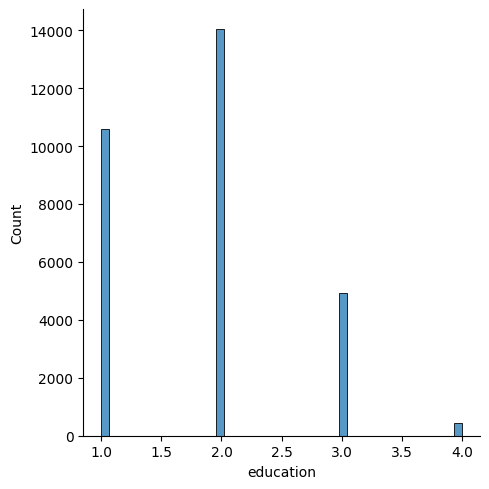

In [7]:
df['education'].replace(0,1,inplace=True)
df['education'] = df['education'].replace({5:4, 6:4})
plt.figure(figsize=(10,18))
sns.displot(df["education"])
plt.show()

In [10]:
df=df.drop(["bill_amt4","bill_amt5","bill_amt6","pay_amt4","pay_amt5","pay_amt6"],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   limit_bal    30000 non-null  float64
 1   sex          30000 non-null  int64  
 2   education    30000 non-null  int64  
 3   marriage     30000 non-null  int64  
 4   age          30000 non-null  int64  
 5   pay_1        30000 non-null  int64  
 6   pay_2        30000 non-null  int64  
 7   pay_3        30000 non-null  int64  
 8   pay_4        30000 non-null  int64  
 9   pay_5        30000 non-null  int64  
 10  pay_6        30000 non-null  int64  
 11  bill_amt1    30000 non-null  float64
 12  bill_amt2    30000 non-null  float64
 13  bill_amt3    30000 non-null  float64
 14  pay_amt1     30000 non-null  float64
 15  pay_amt2     30000 non-null  float64
 16  pay_amt3     30000 non-null  float64
 17  default_pay  30000 non-null  int64  
dtypes: float64(7), int64(11)
memory usage: 4.1 MB


In [14]:
X = df.drop(labels=['default_pay'],axis=1)
Y = df[['default_pay']]

In [15]:
Y

,default_pay
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [16]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [20]:
numerical_cols


Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'pay_amt1', 'pay_amt2', 'pay_amt3'],
      dtype='object')

In [18]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [19]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [21]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [22]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [23]:
X_train.head(2)

,num_pipeline__limit_bal,num_pipeline__sex,num_pipeline__education,num_pipeline__marriage,num_pipeline__age,num_pipeline__pay_1,num_pipeline__pay_2,num_pipeline__pay_3,num_pipeline__pay_4,num_pipeline__pay_5,num_pipeline__pay_6,num_pipeline__bill_amt1,num_pipeline__bill_amt2,num_pipeline__bill_amt3,num_pipeline__pay_amt1,num_pipeline__pay_amt2,num_pipeline__pay_amt3
0,-1.139003,-1.231086,0.218630,0.855242,-1.031921,-0.872883,-0.720412,-0.694606,-0.665419,-1.532938,-0.618300,-0.671877,-0.670261,-0.667972,-0.259967,-0.219680,-0.284034
1,-0.138540,-1.231086,-1.127773,-1.060909,0.599775,0.901613,-1.558100,-0.694606,-0.665419,-0.647261,-1.488736,-0.693935,-0.690625,-0.651531,-0.333370,-0.166585,0.008592


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score

In [25]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

c:\Credit_Prediction\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [26]:
y_pred = classifier.predict(X_test)

In [28]:
accuracy_score(y_pred,y_test),f1_score(y_pred,y_test)

(0.8176666666666667, 0.47319422150882817)